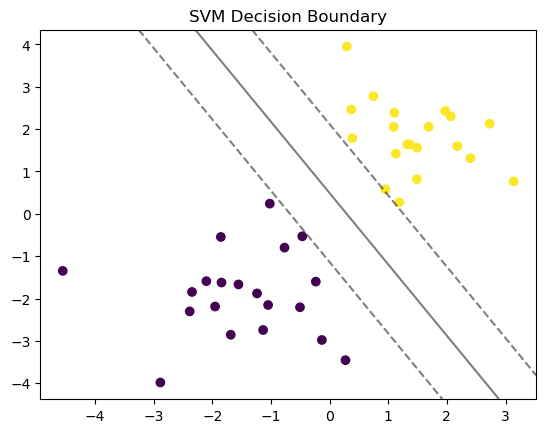

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Generate synthetic data
np.random.seed(0)
X = np.concatenate([np.random.randn(20, 2) - [2, 2], np.random.randn(20, 2) + [2, 2]])
y = np.concatenate([-np.ones(20), np.ones(20)])

# Define the SVM training function
def train_svm(X, y, learning_rate=0.1, num_epochs=100):
    num_samples, num_features = X.shape
    w = np.zeros(num_features)
    b = 0
    
    for epoch in range(1, num_epochs + 1):  # Start from epoch 1 to avoid division by zero
        for i in range(num_samples):
            if y[i] * (np.dot(X[i], w) - b) < 1:
                w = w - learning_rate * (2 / epoch * w - y[i] * X[i])
                b = b - learning_rate * y[i]
    
    return w, b

# Train the SVM
weights, bias = train_svm(X, y)

# Visualize the data and decision boundary
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis')
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()

xx, yy = np.meshgrid(np.linspace(xlim[0], xlim[1], 50), np.linspace(ylim[0], ylim[1], 50))
xy = np.c_[xx.ravel(), yy.ravel()]
Z = np.dot(xy, weights) - bias
Z = Z.reshape(xx.shape)

plt.contour(xx, yy, Z, colors='k', levels=[-1, 0, 1], alpha=0.5, linestyles=['--', '-', '--'])
plt.title('SVM Decision Boundary')
plt.show()
